In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  5 22:21:19 2018

@author: evan9
"""

import inspect
from keras.models import load_model
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
np.random.seed(10)

### SET UP ###
def preprocess_data(raw_df):
    # name
    df = raw_df.drop(['name'], axis=1)
    # age
    age_avg = df['age'].mean()
    df['age'] = df['age'].fillna(age_avg)
    # fare
    fare_avg = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_avg)
    # sex
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    # embarked
    x_df_onehot = pd.get_dummies(data=df, columns=['embarked'])
    
    # convert to array
    ndarray = x_df_onehot.values
    label = ndarray[:, 0]
    features = ndarray[:, 1:]
    
    # normalize features
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaled_features = minmax_scale.fit_transform(features)
    
    return scaled_features, label


def create_dataframe(xls_filepath, ):
    all_df = pd.read_excel(xls_filepath)
    cols = ['survived', 
            'name', 
            'pclass' , 
            'sex', 
            'age', 
            'sibsp',
            'parch', 
            'fare', 
            'embarked']
    all_df = all_df[cols]
    
    #80% train data; 20% test data
    msk = np.random.rand(len(all_df)) < 0.8
    train_df = all_df[msk]
    test_df = all_df[~msk]
    print('total: {0}, train: {1}, test: {2}'.format(len(all_df), len(train_df), len(test_df)))
    
    return all_df, train_df, test_df


def create_model():
    model = Sequential()
    
    # input layer & hidden layer 1
    model.add(Dense(units=40, input_dim=9, 
                    kernel_initializer='uniform', 
                    activation='relu'))
    # hidden layer 2
    model.add(Dense(units=30, 
                    kernel_initializer='uniform', 
                    activation='relu'))
    # output layer
    model.add(Dense(units=1, 
                    kernel_initializer='uniform', 
                    activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

### TRAINING ###
def train_model(model, train_que, train_ans):
    train_history = model.fit(x=train_que, 
                              y=train_ans, 
                              validation_split=0.1, 
                              epochs=30, batch_size=30, verbose=2)
    show_train_history(train_history, 'acc', 'val_acc')
    show_train_history(train_history, 'loss', 'val_loss')    

    return train_history


def show_train_history(train_history, train_accuracy, validation_accuracy):
    plt.plot(train_history.history[train_accuracy])
    plt.plot(train_history.history[validation_accuracy])
    plt.title('Train History')
    plt.ylabel(train_accuracy)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    return

### SAVE & LOAD ###
def save_model(model, model_name):
    model.save(model_name)
    print('Saved to {0}'.format(model_name))

    del model
    return
    

def import_model(model_name):
    model = load_model(model_name)
    print(model.summary())
    print('Loaded from {0}'.format(model_name))

    return model

### PRESENTATION ###
def evaluate_accuracy(model, test_que, test_ans):
    scores = model.evaluate(test_que, test_ans)
    print()
    print('accuracy= %.4f' % (scores[1],))
    
    return


def make_prediction(model, test_que):
    prediction = model.predict_classes(test_que)
    predicted_probability = model.predict(test_que)
    
    return prediction, predicted_probability

Using TensorFlow backend.


total: 1309, train: 1034, test: 275
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None
Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 1s - loss: 0.6900 - acc: 0.5774 - val_loss: 0.6710 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6683 - acc: 0.5957 - val_loss: 0.5920 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6106 - acc: 0.6667 - val_loss: 0.4951 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5461 - acc: 0.7624 - val_loss: 0.4628 - v

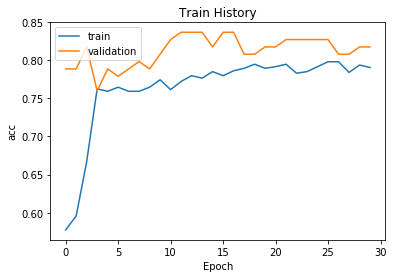

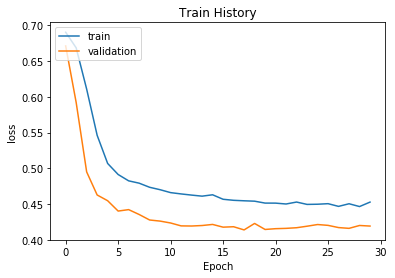

Saved to C:\PyCodes\Keras\File\_H_keras0.h5
275/275 [==============================] - 0s 43us/step

accuracy= 0.8145


In [4]:
filepath = r"C:\PyCodes\Keras\File\titanic3.xls"
hname = r"C:\PyCodes\Keras\File\_H_keras0.h5"
local_vars = {}
local_vars_detail = {}
already_trained = False
    
(all_df, train_df, test_df) = create_dataframe(filepath)
(x_features_train, y_label_train) = preprocess_data(train_df)
(x_features_test, y_label_test) = preprocess_data(test_df)

if already_trained == False:
    model = create_model()
    train_history = train_model(model, x_features_train, y_label_train)
    save_model(model, hname)
elif already_trained == True:
    model = import_model(hname)

evaluate_accuracy(model, x_features_test, y_label_test)

local_vars = inspect.currentframe().f_locals

for key,value in sorted(local_vars.items()):
    if type(value) == np.ndarray:
        local_vars_detail[key] = value.shape
    elif '_df' in key: continue
    else:
        local_vars_detail[key] = [type(value), value]

## 預測資料

### 加入Jack & Rose資料

In [5]:
Jack = pd.Series([0 , 'Jack', 3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = pd.Series([1 , 'Rose', 1, 'female', 20, 1, 0, 100.0000,'S'])

In [6]:
JR_df = pd.DataFrame([list(Jack), list(Rose)],  
                  columns=['survived', 'name','pclass', 'sex', 
                   'age', 'sibsp','parch', 'fare','embarked'])

In [7]:
JR_df

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23,1,0,5.0,S
1,1,Rose,1,female,20,1,0,100.0,S


In [8]:
JR_df.shape

(2, 9)

In [20]:
len(JR_df.columns)

9

In [21]:
len(JR_df)

2

In [9]:
all_df = pd.concat([all_df,JR_df])

In [10]:
all_df[-10:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
1301,0,"Youseff, Mr. Gerious",3,male,45.5,0,0,7.2250,C
1302,0,"Yousif, Mr. Wazli",3,male,NaN,0,0,7.2250,C
1303,0,"Yousseff, Mr. Gerious",3,male,NaN,0,0,14.4583,C
1304,0,"Zabour, Miss. Hileni",3,female,14.5,1,0,14.4542,C
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.2250,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.2250,C
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.8750,S
0,0,Jack,3,male,23.0,1,0,5.0000,S
1,1,Rose,1,female,20.0,1,0,100.0000,S


### 進行預測

In [11]:
(x_features_all, y_label_all) = preprocess_data(all_df)

In [12]:
(all_prediction, all_predicted_probability) = make_prediction(model, x_features_all)

In [13]:
all_predicted_probability[:10]

array([[0.97632   ],
       [0.5945195 ],
       [0.97270375],
       [0.38824564],
       [0.9708728 ],
       [0.28015825],
       [0.94557   ],
       [0.32848704],
       [0.94495094],
       [0.30907226]], dtype=float32)

In [14]:
probability_df = all_df
probability_df.insert(len(all_df.columns), 'probability', all_predicted_probability)

In [15]:
probability_df[:10]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.976320
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.594519
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.972704
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.388246
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.970873
5,1,"Anderson, Mr. Harry",1,male,48.0000,0,0,26.5500,S,0.280158
6,1,"Andrews, Miss. Kornelia Theodosia",1,female,63.0000,1,0,77.9583,S,0.945570
7,0,"Andrews, Mr. Thomas Jr",1,male,39.0000,0,0,0.0000,S,0.328487
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,female,53.0000,2,0,51.4792,S,0.944951
9,0,"Artagaveytia, Mr. Ramon",1,male,71.0000,0,0,49.5042,C,0.309072


### 預測Jack & Rose資料的生存機率

In [16]:
probability_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.147729
1,1,Rose,1,female,20.0,1,0,100.0,S,0.969256


### 查看生存機率高，卻沒有存活

In [17]:
probability_df[(probability_df['survived'] == 0) & (probability_df['probability'] >= 0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.972704
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.970873
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.979061
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.977342
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.959158
